<a id=top-page></a>
# Cost function application to detecting large gradients on manifolds

In this notebook, we explore the application of the cost function, $\mathcal{L}$, to detecting large gradients in a dependent variable, $\phi$, on a manifold.

The analysis in this notebook is performed in the following steps:

- [Load the reacting flow data](#data)
- [Create a 3D PCA projection](#manifold)
- [Assess the manifold with respect to the hydrogen mass fraction variable, $\phi = Y_{H_2}$](#hydrogen)
- [Assess the manifold with respect to the temperature variable, $\phi = T$](#temperature)
- [Plot a comparison of two dependent variables](#plot-comparison)

***

In [1]:
%run -i imports.py
%matplotlib inline

In [2]:
bandwidth_values = np.logspace(-7, 3, 200)
penalty = 'log-sigma-over-peak'
norm = 'max'
power = 1
colormap = 'plasma'
save_figures = True

<a id=data></a>
***

## Load the reacting flow data

[Go to the top](#top-page)

In [3]:
state_space = pd.read_csv('../data/reacting-flow-hydrogen-air-steady-state-space.csv', header=None).to_numpy()
state_space_names = list(pd.read_csv('../data/reacting-flow-hydrogen-air-steady-state-space-names.csv', header=None).to_numpy().ravel())
mf = pd.read_csv('../data/reacting-flow-hydrogen-air-steady-mixture-fraction.csv', header=None).to_numpy()

(idx_1, values_1) = np.where(mf==1)
state_space = np.delete(state_space, idx_1, axis=0)

(idx_0, values_0) = np.where(mf==0)
state_space = np.delete(state_space, idx_0, axis=0)

<a id=manifold></a>
***

## Create a 3D PCA projection

[Go to the top](#top-page)

In [4]:
example_subset = [0,1,4]
subset_pca = reduction.PCA(state_space[:,example_subset], scaling='vast', n_components=3)
subset_PCs = subset_pca.transform(state_space[:,example_subset])

<a id=hydrogen></a>
***

## Assess the manifold with respect to the hydrogen mass fraction variable, $\phi = Y_{H_2}$

[Go to the top](#top-page)

In [5]:
tic = time.perf_counter()

variance_data_H2 = analysis.compute_normalized_variance(subset_PCs,
                                                        state_space[:,2:3],
                                                        depvar_names=['H2'],
                                                        bandwidth_values=bandwidth_values)

derivative_H2, sigma_H2, _ = analysis.normalized_variance_derivative(variance_data_H2)

cost_H2 = analysis.cost_function_normalized_variance_derivative(variance_data_H2,
                                                                penalty_function=penalty,
                                                                power=power,
                                                                norm=norm,
                                                                integrate_to_peak=False)

toc = time.perf_counter()

print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 1.9 minutes.
----------------------------------------


In [6]:
print(cost_H2)

1.842668240295413


<a id=temperature></a>
***

## Assess the manifold with respect to the temperature variable, $\phi = T$

[Go to the top](#top-page)

In [7]:
tic = time.perf_counter()

variance_data_T = analysis.compute_normalized_variance(subset_PCs,
                                                       state_space[:,0:1],
                                                       depvar_names=['T'],
                                                       bandwidth_values=bandwidth_values)

derivative_T, sigma_T, _ = analysis.normalized_variance_derivative(variance_data_T)

cost_T = analysis.cost_function_normalized_variance_derivative(variance_data_T,
                                                               penalty_function=penalty,
                                                               power=power,
                                                               norm=norm,
                                                               integrate_to_peak=False)

toc = time.perf_counter()

print(f'\tTime it took: {(toc - tic)/60:0.1f} minutes.\n' + '-'*40)

	Time it took: 1.8 minutes.
----------------------------------------


In [8]:
print(cost_T)

0.9573730548841088


<a id=plot-comparison></a>

***

## Plot a comparison of two dependent variables

[Go to the top](#top-page)

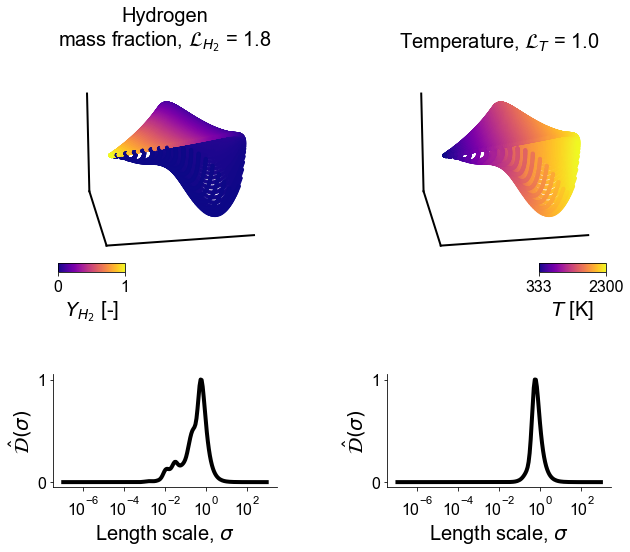

In [9]:
fig = plt.figure(figsize=(10, 8))
widths = [1, 0.2, 1]
heights = [1, 0.2, 0.5]
spec = fig.add_gridspec(ncols=3, nrows=3, width_ratios=widths, height_ratios=heights)

ax = fig.add_subplot(spec[0,0], projection='3d')
scat_a = ax.scatter(subset_PCs[:,0], subset_PCs[:,1], subset_PCs[:,2], c=state_space[:,2], s=10, alpha=1, cmap=colormap)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
for axis in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:
    axis.line.set_linewidth(2)
ax.tick_params(pad=5)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.view_init(elev=20, azim=80)
plt.title("Hydrogen\nmass fraction, $\mathcal{L}_{H_2}$ = " + str(round(cost_H2,1)), fontsize=20)
cbaxes = inset_axes(ax, width="30%", height="4%", loc='lower left')
cbar = plt.colorbar(scat_a, ticks=[np.min(state_space[:,2]),np.max(state_space[:,2])], orientation='horizontal', aspect=8, cax=cbaxes)
cbar.ax.set_xlabel('$Y_{H_2}$ [-]', fontsize=20, rotation=0)
cbar.ax.set_xticklabels(['0', '1'])
for t in cbar.ax.get_xticklabels():
     t.set_fontsize(16)

ax = fig.add_subplot(spec[0,2], projection='3d')
scat_a = ax.scatter(subset_PCs[:,0], subset_PCs[:,1], subset_PCs[:,2], c=state_space[:,0], s=10, alpha=1, cmap=colormap)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
for axis in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:
    axis.line.set_linewidth(2)
ax.tick_params(pad=5)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.view_init(elev=20, azim=80)
plt.title("Temperature, $\mathcal{L}_T$ = " + str(round(cost_T,1)), fontsize=20)
cbaxes = inset_axes(ax, width="30%", height="4%", loc='lower right')
cbar = plt.colorbar(scat_a, ticks=[np.min(state_space[:,0]),2300], orientation='horizontal', aspect=8, cax=cbaxes)
cbar.ax.set_xlabel('$T$ [K]', fontsize=20, rotation=0)
for t in cbar.ax.get_xticklabels():
     t.set_fontsize(16)

ax = fig.add_subplot(spec[2,0])
plt.semilogx(sigma_H2, derivative_H2['H2'], color='k', lw=4)
plt.xlabel('Length scale, $\sigma$', fontsize=20)
plt.ylabel('$\hat{\mathcal{D}}(\sigma)$', fontsize=20)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks(fontsize=16)
plt.yticks([0,1], fontsize=16)
plt.minorticks_off()

ax = fig.add_subplot(spec[2,2])
plt.semilogx(sigma_T, derivative_T['T'], color='k', lw=4)
plt.xlabel('Length scale, $\sigma$', fontsize=20)
plt.ylabel('$\hat{\mathcal{D}}(\sigma)$', fontsize=20)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks(fontsize=16)
plt.yticks([0,1], fontsize=16)
plt.minorticks_off()

if save_figures: plt.savefig('../figures/Figure-4.png', dpi=300, bbox_inches='tight')

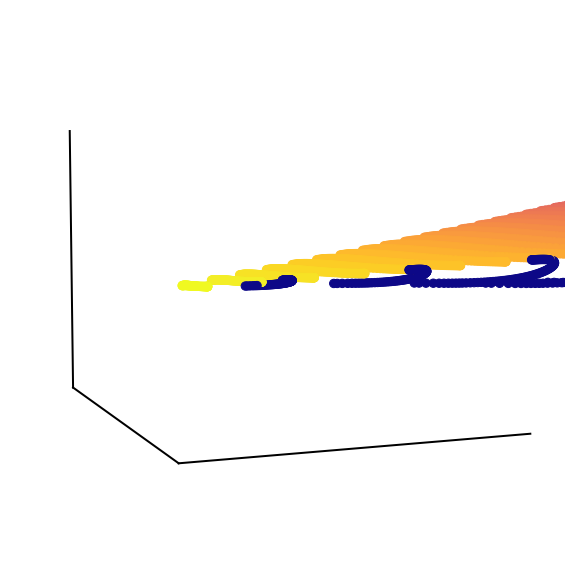

In [10]:
fig = plt.figure(figsize=(10, 15))
spec = fig.add_gridspec(ncols=1, nrows=1, width_ratios=[1], height_ratios=[1])
ax = fig.add_subplot(spec[0,0], projection='3d')
scat_a = ax.scatter(subset_PCs[:,0], subset_PCs[:,1], subset_PCs[:,2], c=state_space[:,2], s=70, alpha=1, cmap=colormap)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlim([4.5,7])
ax.set_ylim([-2,0])
for axis in [ax.w_xaxis, ax.w_yaxis, ax.w_zaxis]:
    axis.line.set_linewidth(2)
ax.tick_params(pad=5)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.view_init(elev=10, azim=70)

if save_figures: plt.savefig('../figures/Figure-4-zoomed.png', dpi=300, bbox_inches='tight')

***